In [2]:
## load initial packages
import pandas as pd
import geopandas as gpd
import numpy as np
import os

## repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
## load datasets
hls = pd.read_excel("../data/HLS_data/national_hl_scores.xlsx")
hls.head()

,Census block group ID,Health literacy estimate
0,10010201001,248.91
1,10010201002,248.66
2,10010202001,233.55
3,10010202002,238.55
4,10010203001,247.96


In [4]:
hls['Census block group ID'] = hls['Census block group ID'].astype(str)
hls['Census block group ID'] = hls['Census block group ID'].apply(lambda x: x.zfill(12) if len(x) == 11 else x)
hls.info

<bound method DataFrame.info of        Census block group ID  Health literacy estimate
0               010010201001                    248.91
1               010010201002                    248.66
2               010010202001                    233.55
3               010010202002                    238.55
4               010010203001                    247.96
...                      ...                       ...
216859          560459511001                    249.46
216860          560459511002                    248.95
216861          560459513001                    248.07
216862          560459513002                    246.20
216863          560459513003                    253.89

[216864 rows x 2 columns]>

In [25]:
import requests
import re
import zipfile
import os

# URL of the website
url = "https://www2.census.gov/geo/tiger/TIGER2010/BG/2000/"

# Send a GET request to the URL
response = requests.get(url)

# Extract the links to .zip files using regular expressions
zip_links = re.findall(r'href=[\'"]?([^\'" >]+\.zip)', response.text)

# Define the pattern to match
pattern = r'tl_2010_[0-9]{2}_bg00.zip'

# Filter the links to keep only the ones matching the defined pattern
filtered_links = [link for link in zip_links if re.match(pattern, link)]

# Specify the target directory for extraction
target_directory = "../data/mapping_data"

# Download and unzip the filtered links
for link in filtered_links:
    # Construct the download URL
    download_url = url + link
    
    # Send a GET request to download the file
    download_response = requests.get(download_url)
    
    # Save the downloaded file
    file_path = os.path.join(target_directory, link)
    with open(file_path, 'wb') as file:
        file.write(download_response.content)
    
    # Unzip the file to the target directory
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall(target_directory)
    
    # Remove the downloaded zip file
    os.remove(file_path)


15794624

7406041

11591051

15698143

48193003

12386103

4952470

1328435

506282

17239228

18701868

2135460

7103830

17033003

10982889

7127156

5152669

20206104

12673713

4973913

8806312

7498767

10144579

12001330

15332839

17618662

11242354

3911762

4326478

1928329

8306473

7280797

14808388

25282238

2764462

17073652

10139058

15916041

23378241

1310423

13330941

5063804

22925589

43042679

7610528

1555555

22088478

14613912

14762194

13236564

4221126

128516

338971

207083

5251831

837948

In [5]:
# import os
# import zipfile

# directory = "../data/HLS_data"  # Replace with the directory containing the zip files

# # Iterate over all files in the directory
# for file_name in os.listdir(directory):
#     if file_name.endswith(".zip"):
#         file_path = os.path.join(directory, file_name)

#         with zipfile.ZipFile(file_path, 'r') as zip_ref:
#             zip_ref.extractall(directory)

#         print(f"Unzipped: {file_name}")

# print("All zip files extracted successfully.")


In [6]:
# directory = "../data/HLS_data"  # Replace with the directory containing the extracted files

# # Iterate over all files in the directory
# for file_name in os.listdir(directory):
#     file_path = os.path.join(directory, file_name)

#     if file_name.endswith(".shp"):
#         # Keep .shp file, do nothing
#         pass
#     else:
#         # Delete the file if it's not a .shp file
#         os.remove(file_path)
#         print(f"Deleted: {file_name}")

# print("Cleanup completed.")


In [7]:
# import os
# import shapefile

# directory = "../data/HLS_data"  # Replace with the directory containing the .shp files

# # Iterate over all files in the directory
# for file_name in os.listdir(directory):
#     if file_name.endswith(".shp"):
#         shapefile_path = os.path.join(directory, file_name)

#         # Restore the .shx file
#         shapefile.fix_index(shapefile_path)

# print("All .shx files restored.")



In [31]:
# us_map1 = gpd.read_file("../tl_2022_01_bg/tl_2022_01_bg.shp")
# us_map1.head()

directory = "../data/HLS_data"  # Replace with the directory containing the .shp files

# Initialize an empty GeoDataFrame
combined_gdf = gpd.GeoDataFrame()

# Iterate over all files in the directory
for file_name in os.listdir(directory):
    if file_name.endswith(".shp"):
        file_path = os.path.join(directory, file_name)

        # Read the .shp file as a GeoDataFrame
        gdf = gpd.read_file(file_path)

        # Append the GeoDataFrame to the combined GeoDataFrame
        combined_gdf = combined_gdf.append(gdf, ignore_index=True)

print("All .shp files read and combined into one GeoDataFrame.")

/var/folders/4l/ygb5zg1102qg26s9tsr84m0w0000gn/T/ipykernel_79770/1010026808.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_gdf = combined_gdf.append(gdf, ignore_index=True)
/var/folders/4l/ygb5zg1102qg26s9tsr84m0w0000gn/T/ipykernel_79770/1010026808.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_gdf = combined_gdf.append(gdf, ignore_index=True)
/var/folders/4l/ygb5zg1102qg26s9tsr84m0w0000gn/T/ipykernel_79770/1010026808.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_gdf = combined_gdf.append(gdf, ignore_index=True)
/var/folders/4l/ygb5zg1102qg26s9tsr84m0w0000gn/T/ipykernel_79770/1010026808.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/4l/ygb5zg1102qg26s9tsr84m0w0000gn/T/ipykernel_79770/1010026808.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_gdf = combined_gdf.append(gdf, ignore_index=True)
/var/folders/4l/ygb5zg1102qg26s9tsr84m0w0000gn/T/ipykernel_79770/1010026808.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_gdf = combined_gdf.append(gdf, ignore_index=True)
/var/folders/4l/ygb5zg1102qg26s9tsr84m0w0000gn/T/ipykernel_79770/1010026808.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_gdf = combined_gdf.append(gdf, ignore_index=True)
/var/folders/4l/ygb5zg1102qg26s9tsr84m0w0000gn/T/ipykernel_79770/1010026808.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

All .shp files read and combined into one GeoDataFrame.


/var/folders/4l/ygb5zg1102qg26s9tsr84m0w0000gn/T/ipykernel_79770/1010026808.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_gdf = combined_gdf.append(gdf, ignore_index=True)


In [9]:
combined_gdf.to_csv("census_geo.csv")

KeyboardInterrupt: 

In [32]:
combined_gdf.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,10,003,013505,1,100030135051,Block Group 1,G5030,S,1952532,0,+39.7761890,-075.7266050,"POLYGON ((-75.73943 39.77293, -75.73928 39.773..."
1,10,003,013614,2,100030136142,Block Group 2,G5030,S,1228852,0,+39.7147662,-075.6524113,"POLYGON ((-75.66302 39.72121, -75.66242 39.721..."
2,10,003,001600,2,100030016002,Block Group 2,G5030,S,96011,0,+39.7448316,-075.5537764,"POLYGON ((-75.55638 39.74458, -75.55608 39.745..."
3,10,003,011900,3,100030119003,Block Group 3,G5030,S,6520980,748739,+39.7754473,-075.6272557,"POLYGON ((-75.64591 39.79557, -75.64588 39.795..."
4,10,003,016901,1,100030169011,Block Group 1,G5030,S,21323266,0,+39.3388351,-075.6549910,"POLYGON ((-75.69185 39.33300, -75.69180 39.333..."


In [38]:
merged = pd.merge(combined_gdf, hls, left_on = "GEOID", right_on = "Census block group ID")
merged = merged.drop(columns = ["STATEFP", "COUNTYFP", "TRACTCE", "BLKGRPCE", "NAMELSAD", "MTFCC", "FUNCSTAT", "ALAND", "AWATER", 
                      "Census block group ID"])
merged.sort_values("GEOID").head()

# Check if every cell is filled
is_filled = merged.notnull().values.all()

# Display the result
if is_filled:
    print("Every cell is filled.")
else:
    print("There are missing values in the dataframe.")
    
merged.info


,GEOID,INTPTLAT,INTPTLON,geometry,Health literacy estimate
135069,010010201001,+32.4658320,-086.4896607,"POLYGON ((-86.51038 32.47225, -86.51031 32.472...",248.91
133042,010010201002,+32.4858732,-086.4896724,"POLYGON ((-86.50461 32.47723, -86.50453 32.477...",248.66
133054,010010202001,+32.4800823,-086.4749744,"POLYGON ((-86.48127 32.47744, -86.48126 32.477...",233.55
133055,010010202002,+32.4644350,-086.4697659,"POLYGON ((-86.47611 32.46765, -86.47564 32.467...",238.55
133066,010010203001,+32.4801750,-086.4607925,"POLYGON ((-86.47087 32.47573, -86.47084 32.475...",247.96


Every cell is filled.


<bound method DataFrame.info of                GEOID     INTPTLAT      INTPTLON  \
0       100030135051  +39.7761890  -075.7266050   
1       100030136142  +39.7147662  -075.6524113   
2       100030016002  +39.7448316  -075.5537764   
3       100030119003  +39.7754473  -075.6272557   
4       100030169011  +39.3388351  -075.6549910   
...              ...          ...           ...   
168246  310899741002  +42.3118870  -098.9426873   
168247  310899740002  +42.7509045  -099.0159325   
168248  310899741003  +42.1684870  -098.6028423   
168249  310899741001  +42.3566016  -098.4404172   
168250  311090013012  +40.8033453  -096.6387870   

                                                 geometry  \
0       POLYGON ((-75.73943 39.77293, -75.73928 39.773...   
1       POLYGON ((-75.66302 39.72121, -75.66242 39.721...   
2       POLYGON ((-75.55638 39.74458, -75.55608 39.745...   
3       POLYGON ((-75.64591 39.79557, -75.64588 39.795...   
4       POLYGON ((-75.69185 39.33300, -75.69180 39

In [ ]:
# read in geocodes of CHCs 

# df = pd.read_csv("../data/CHC_data/geocode/geocodes_6140 S Broadway Lorain, OH 44053-3821_200 Denton, TX 76209-4958.csv")

# geocodes_gdf = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.geometry.str.extract(r'POINT \((.*?)\)')[0].str.split().str[0].astype(float), df.geometry.str.extract(r'POINT \((.*?)\)')[0].str.split().str[1].astype(float)))

# geocodes_gdf.head()



In [12]:
directory = "../data/CHC_data/geocode"  # Replace with the directory containing the .shp files

# Initialize an empty GeoDataFrame
combined_geocodes = gpd.GeoDataFrame()

# Iterate over all files in the directory
for file_name in os.listdir(directory):
    if file_name.endswith(".csv"):
        file_path = os.path.join(directory, file_name)

        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)

        # Create a GeoDataFrame from the DataFrame with the geometry column
        geometry = gpd.points_from_xy(df.geometry.str.extract(r'POINT \((.*?)\)')[0].str.split().str[0].astype(float), df.geometry.str.extract(r'POINT \((.*?)\)')[0].str.split().str[1].astype(float))
        gdf = gpd.GeoDataFrame(df, geometry=geometry)

        # Append the GeoDataFrame to the combined GeoDataFrame
        combined_geocodes = combined_geocodes.append(gdf, ignore_index=True)

/var/folders/4l/ygb5zg1102qg26s9tsr84m0w0000gn/T/ipykernel_79770/1847173398.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_geocodes = combined_geocodes.append(gdf, ignore_index=True)
/var/folders/4l/ygb5zg1102qg26s9tsr84m0w0000gn/T/ipykernel_79770/1847173398.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_geocodes = combined_geocodes.append(gdf, ignore_index=True)
/var/folders/4l/ygb5zg1102qg26s9tsr84m0w0000gn/T/ipykernel_79770/1847173398.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_geocodes = combined_geocodes.append(gdf, ignore_index=True)
/var/folders/4l/ygb5zg1102qg26s9tsr84m0w0000gn/T/ipykernel_79770/1847173398.py:19: FutureWarning: The frame.append method is deprecated and

In [24]:
combined_geocodes.info
null = combined_geocodes.isnull().sum(axis = 1)
count_nan_rows = len(null[null > 0])

print("Number of NaN rows:", count_nan_rows)

<bound method DataFrame.info of                           geometry  \
0      POINT (-119.20711 36.29522)   
1                      POINT EMPTY   
2      POINT (-119.86720 36.77181)   
3                      POINT EMPTY   
4      POINT (-119.73202 36.77951)   
...                            ...   
13285                  POINT EMPTY   
13286   POINT (-73.88734 40.88132)   
13287   POINT (-73.90618 40.87754)   
13288   POINT (-73.90437 40.86435)   
13289   POINT (-73.89657 40.87026)   

                                                 address  
0      S Farmersville Blvd & Oakland St (NB), South F...  
1                                                    NaN  
2      West Clinton Avenue, 93705, Fresno, California...  
3                                                    NaN  
4      East Shields Avenue, 93726, Fresno, California...  
...                                                  ...  
13285                                                NaN  
13286  DeWitt Clinton High School, 100,

Number of NaN rows: 4092


/Users/jessiewang/opt/anaconda3/lib/python3.9/site-packages/geopandas/plotting.py:649: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


<AxesSubplot:>

<AxesSubplot:>

(-130.0, -65.0)

(22.0, 50.0)

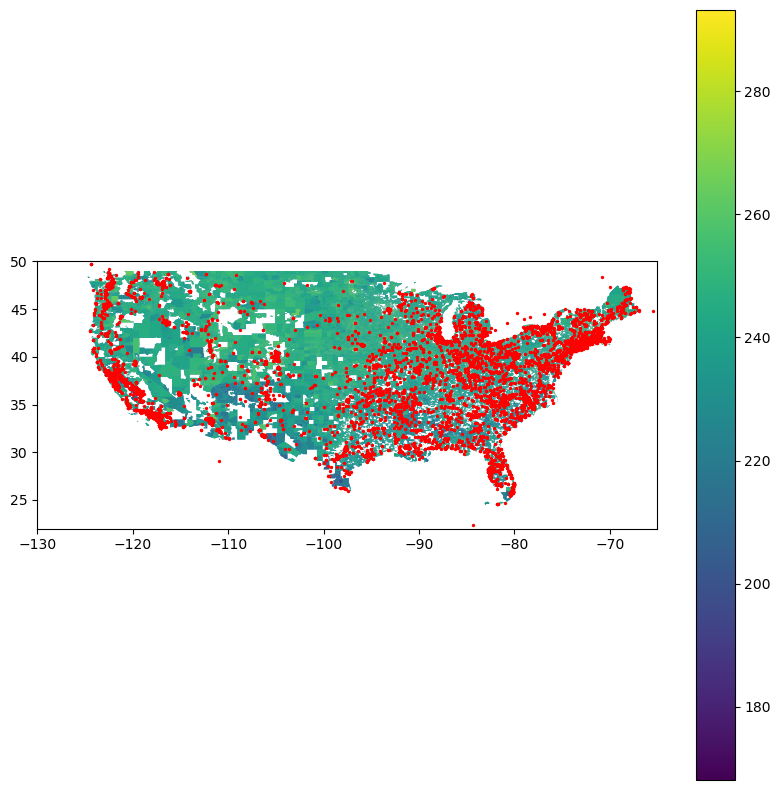

In [36]:
import matplotlib.pyplot as plt
import geopandas as gpd

# geomerged = gpd.GeoDataFrame(merged)
fig, ax = plt.subplots(figsize = (10, 10))
ax = merged.plot(axes=ax)
merged.plot(ax = ax, column = "Health literacy estimate", legend = True)
combined_geocodes.plot(ax = ax, color = 'red', markersize = 2)
plt.xlim(-130, -65)
plt.ylim(22, 50)
plt.show()

# us_map.plot(ax = ax, color='lightgrey')
# al_locations.plot(ax = ax)

In [37]:
combined_geocodes = combined_geocodes.set_crs(merged.crs)
combined_geocodes = combined_geocodes.to_crs(merged.crs)
merged.info
combined_geocodes.info

<bound method DataFrame.info of                GEOID     INTPTLAT      INTPTLON  \
0       100030135051  +39.7761890  -075.7266050   
1       100030136142  +39.7147662  -075.6524113   
2       100030016002  +39.7448316  -075.5537764   
3       100030119003  +39.7754473  -075.6272557   
4       100030169011  +39.3388351  -075.6549910   
...              ...          ...           ...   
168246  310899741002  +42.3118870  -098.9426873   
168247  310899740002  +42.7509045  -099.0159325   
168248  310899741003  +42.1684870  -098.6028423   
168249  310899741001  +42.3566016  -098.4404172   
168250  311090013012  +40.8033453  -096.6387870   

                                                 geometry  \
0       POLYGON ((-75.73943 39.77293, -75.73928 39.773...   
1       POLYGON ((-75.66302 39.72121, -75.66242 39.721...   
2       POLYGON ((-75.55638 39.74458, -75.55608 39.745...   
3       POLYGON ((-75.64591 39.79557, -75.64588 39.795...   
4       POLYGON ((-75.69185 39.33300, -75.69180 39

<bound method DataFrame.info of                           geometry  \
0      POINT (-119.20711 36.29522)   
1                      POINT EMPTY   
2      POINT (-119.86720 36.77181)   
3                      POINT EMPTY   
4      POINT (-119.73202 36.77951)   
...                            ...   
13285                  POINT EMPTY   
13286   POINT (-73.88734 40.88132)   
13287   POINT (-73.90618 40.87754)   
13288   POINT (-73.90437 40.86435)   
13289   POINT (-73.89657 40.87026)   

                                                 address  
0      S Farmersville Blvd & Oakland St (NB), South F...  
1                                                    NaN  
2      West Clinton Avenue, 93705, Fresno, California...  
3                                                    NaN  
4      East Shields Avenue, 93726, Fresno, California...  
...                                                  ...  
13285                                                NaN  
13286  DeWitt Clinton High School, 100,

In [1]:
merged['geometry'] = merged['geometry'].astype(str)
combined_geocodes['geometry'] = combined_geocodes['geometry'].astype(str)

# Perform a spatial join to associate each point with its corresponding polygon
joined_data = gpd.sjoin(combined_geocodes, merged, how='left', op='within')

# Group the data by the polygon geometry and count the number of points
point_counts = joined_data.groupby('geometry').size()

# Print the point counts for each polygon
print(point_counts)

NameError: name 'merged' is not defined